In [7]:
import numpy as np
import os
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
os.chdir(r'C:\Users\Consultant20162\Desktop\Module-6')

In [9]:
dataset=pd.read_csv('cereal.csv')

In [10]:
dataset

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


# 1. Histogram

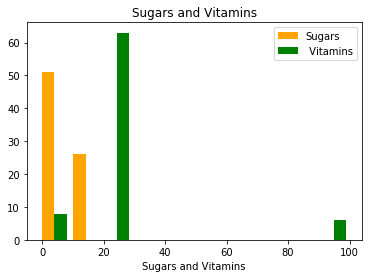

In [13]:
plt.hist([dataset["sugars"], dataset["vitamins"]],
         color=['orange', 'green'])
plt.title("Sugars and Vitamins")
plt.xlabel("Sugars and Vitamins")
plt.legend(["Sugars", " Vitamins"])
plt.show()

# 2.Change the names

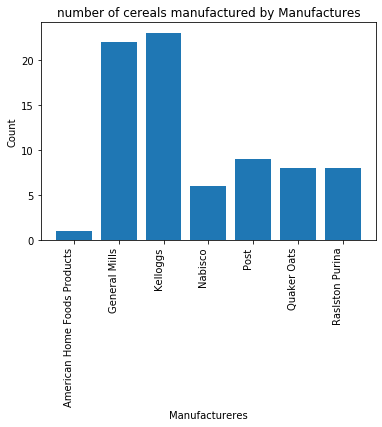

In [17]:
dict_mfr = {'N': 'Nabisco',
            'Q': 'Quaker Oats',
            'K': 'Kelloggs',
            'R': 'Raslston Purina',
            'G': 'General Mills',
            'P': 'Post',
            'A': 'American Home Foods Products'}

dataset["manufactures"] = [dict_mfr[mfr] for mfr in dataset["mfr"]]

grouped_mfr = dataset.groupby(["manufactures"], as_index=False).count()
x = grouped_mfr["manufactures"]
y = grouped_mfr["mfr"]

plt.bar(x, y)

plt.setp(plt.gca().get_xticklabels(), rotation=90, horizontalalignment='right')
plt.xlabel("Manufactureres")
plt.ylabel("Count")
plt.title("number of cereals manufactured by Manufactures")
plt.show()

# 3. Linear Regression

In [19]:
from sklearn.model_selection import train_test_split
X = dataset.iloc[:, 3:15]
Y = dataset["rating"]

In [20]:
x_train, x_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=10)

In [21]:
from sklearn.linear_model import LinearRegression
liner_model = LinearRegression()
liner_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
predicted_ratings = liner_model.predict(x_test)

In [23]:
predicted_ratings

array([68.23588488, 93.70491267, 21.87129234, 46.8956436 , 40.44877244,
       36.5236834 , 36.47151208, 58.34514154, 52.07689672, 33.17409451,
       59.42550476, 45.32807428, 49.78744508, 64.53381607, 34.38484339,
       63.00564546, 34.13976444, 28.59278466, 37.13686308, 26.73451544])

In [25]:

from sklearn.metrics import r2_score
r2_score(predicted_ratings,y_test)

0.9999999999999996